In [1]:
from itertools import cycle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator, AutoLocator
from mpltools import annotation

plt.style.use('seaborn-poster')

In [2]:
!ls

convplot.ipynb
conv_result
nohup.out
par_mesh
quad_deg1.png
quad_deg2.png
quad_deg3.png
quad_deg4.png
results_lsh_full_meshless_par_quad_errors
results_lsh_full_meshless_par_tri_errors
results_lsh_full__quad_errors
results_lsh_full__tri_errors
results_lsh_lambda_meshless_par_quad_errors
results_lsh_lambda_meshless_par_tri_errors
results_lsh_lambda__quad_errors
results_lsh_lambda__tri_errors
results_lsh_mass_meshless_par_quad_errors
results_lsh_mass_meshless_par_tri_errors
results_lsh_mass__quad_errors
results_lsh_mass__tri_errors
results_lsh_meshless_par_quad_errors
results_lsh_meshless_par_tri_errors
results_lsh__quad_errors
results_lsh__tri_errors


In [3]:
result_cases_dirname_list = {
    "ls-h": "results_lsh_meshless_par_tri_errors",
    "ls-h-mass": "results_lsh_mass_meshless_par_tri_errors",
    "ls-h-lambda": "results_lsh_lambda_meshless_par_tri_errors",
    "ls-h-full": "results_lsh_full_meshless_par_tri_errors"
}

In [4]:
all_results = dict()
for case in result_cases_dirname_list:
    dirname = result_cases_dirname_list[case]
    df_result_case = pd.read_csv("./%s/errors.csv" % dirname)
    columns_to_apply = ["H1-error p", "Hdiv-error u", "L2-error p", "L2-error u", "Mesh size"]
    df_result_case[columns_to_apply] = df_result_case[columns_to_apply].apply(lambda x: np.log10(x))
    all_results[case] = df_result_case
    
all_results['ls-h']

,Unnamed: 0,Cells,Degree,Element,H1-error p,Hdiv-error u,L2-error p,L2-error u,Mesh size
0,0,200,1,Tri,-1.526890,0.912628,-1.526890,-0.399632,-0.849485
1,1,450,1,Tri,-1.873315,0.739304,-1.873315,-0.658770,-1.025576
2,2,800,1,Tri,-2.121286,0.615311,-2.121286,-0.846824,-1.150515
3,3,1250,1,Tri,-2.314330,0.518826,-2.314330,-0.995756,-1.247425
4,4,1800,1,Tri,-2.472363,0.439868,-2.472363,-1.119663,-1.326606
5,5,2450,1,Tri,-2.606136,0.373051,-2.606136,-1.226059,-1.393553
6,6,200,2,Tri,-2.800873,-0.003189,-2.800873,-1.559808,-0.849485
7,7,450,2,Tri,-3.335830,-0.352143,-3.335830,-2.063029,-1.025576
8,8,800,2,Tri,-3.713799,-0.600891,-3.713799,-2.418652,-1.150515
9,9,1250,2,Tri,-4.006260,-0.794189,-4.006260,-2.693456,-1.247425


In [5]:
results_deg1 = dict()
results_deg2 = dict()
results_deg3 = dict()
results_deg4 = dict()

for case in result_cases_dirname_list:
    results_deg1[case] = all_results[case][all_results[case]["Degree"] == 1]
    results_deg2[case] = all_results[case][all_results[case]["Degree"] == 2]
    results_deg3[case] = all_results[case][all_results[case]["Degree"] == 3]
    results_deg4[case] = all_results[case][all_results[case]["Degree"] == 4]
    
results_deg1

{'ls-h':    Unnamed: 0  Cells  Degree Element  H1-error p  Hdiv-error u  L2-error p  \
 0           0    200       1     Tri   -1.526890      0.912628   -1.526890   
 1           1    450       1     Tri   -1.873315      0.739304   -1.873315   
 2           2    800       1     Tri   -2.121286      0.615311   -2.121286   
 3           3   1250       1     Tri   -2.314330      0.518826   -2.314330   
 4           4   1800       1     Tri   -2.472363      0.439868   -2.472363   
 5           5   2450       1     Tri   -2.606136      0.373051   -2.606136   
 
    L2-error u  Mesh size  
 0   -0.399632  -0.849485  
 1   -0.658770  -1.025576  
 2   -0.846824  -1.150515  
 3   -0.995756  -1.247425  
 4   -1.119663  -1.326606  
 5   -1.226059  -1.393553  ,
 'ls-h-mass':    Unnamed: 0  Cells  Degree Element  H1-error p  Hdiv-error u  L2-error p  \
 0           0    200       1     Tri   -1.557410      0.912592   -1.557410   
 1           1    450       1     Tri   -1.894151      0.739287   -1.

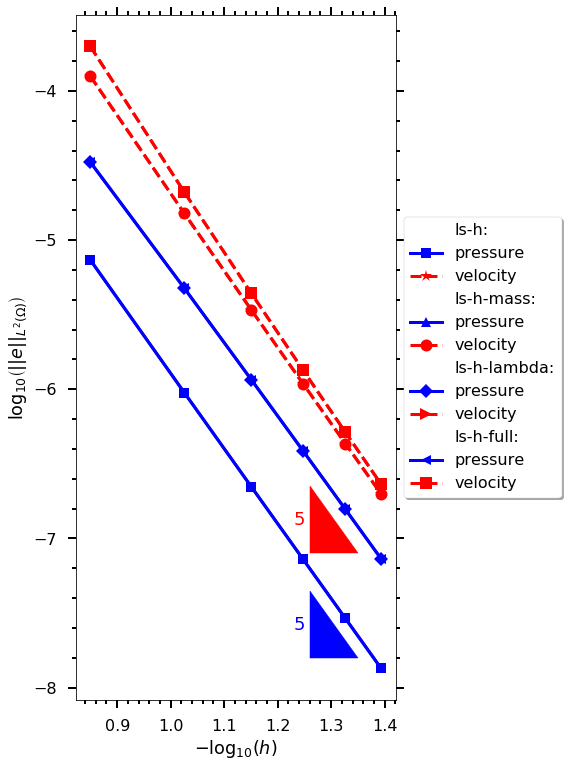

In [19]:
def plot_convergence_rate(
    results,
    degree,
    origin_slope_scalar=(1.35, -2.25),
    origin_slope_flux=(1.35, -1.4),
    save_plot=False,
    file_to_save='',
    dir_to_save='',
    figure_extension='png',
    display_plot=True,
    high_quality=False,
    size_frac=0.2,
    figsize=(8, 10)
):
    if high_quality:
            fig, ax = plt.subplots(figsize=figsize, dpi=500)
    else:
        fig, ax = plt.subplots(figsize=figsize)

    cycle_colors = cycle('brgcmk')
    color_scalar = next(cycle_colors)
    color_flux = next(cycle_colors)
    markers = cycle(('s', '*', '^', 'o', 'D', '>', '<')) 
    for case in results:
        mesh_size = -results[case]["Mesh size"].values
        scalar_error = results[case]["L2-error p"].values
        flux_error = results[case]["L2-error u"].values

        marker_scalar = next(markers)
        ax.plot([np.nan], [np.nan], '', color='w', label='%s:' % case)
        ax.plot(
            mesh_size, 
            scalar_error,
            linestyle="-",
            marker=marker_scalar,
            color=color_scalar,
            markersize=10,
            linewidth=3,
            label="pressure"
        )

        marker_flux = next(markers)
        ax.plot(
            mesh_size, 
            flux_error,
            linestyle="--",
            marker=marker_flux,
            color=color_flux,
            markersize=12,
            linewidth=3,
            label="velocity"
        )
        
        
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                     box.width, box.height * 0.9])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),
              fancybox=True, shadow=True)
    
    plt.xlabel(r"$-\log_{10}( h )$")
    plt.ylabel(r"$\log_{10}\left(||e||_{L^2(\Omega)}\right)$")

    ax.tick_params(which='both', top=True, right=True)
    ax.xaxis.set_major_locator(AutoLocator())
    ax.xaxis.set_minor_locator(AutoMinorLocator())
    ax.yaxis.set_major_locator(AutoLocator())
    ax.yaxis.set_minor_locator(AutoMinorLocator())
    ax.tick_params(which='both', width=2)
    ax.tick_params(which='major', length=8)
    ax.tick_params(which='minor', length=4)

    slope_value = degree + 1
    blue_x, blue_y = origin_slope_flux
    red_x, red_y = origin_slope_scalar
    annotation.slope_marker(
        origin=(red_x, red_y), 
        slope=-slope_value, 
        invert=True, 
        size_frac=size_frac, 
        pad_frac=0.1, 
        text_kwargs={
            'fontsize': 18,
            'text': slope_value,
            'color': color_scalar
        },
        poly_kwargs={
            'color': color_scalar,
            'alpha': 1
        },
        ax=ax
    )

    # slope_value = 2
    annotation.slope_marker(
        origin=(blue_x, blue_y), 
        slope=-slope_value, 
        invert=True, 
        size_frac=size_frac, 
        pad_frac=0.1, 
        text_kwargs={
            'fontsize': 18,
            'text': slope_value,
            'color': color_flux
        },
        poly_kwargs={
            'color': color_flux,
            'alpha': 1
        },
        ax=ax
    )

    plt.tight_layout()
    if save_plot:
        if dir_to_save == '':
            dir_to_save = './conv_result'

        os.makedirs(dir_to_save, exist_ok=True)

        if file_to_save == '':
            file_to_save = 'plot_conv_%i' % degree

        file_to_save = file_to_save + (".%s" % figure_extension)
        plt.savefig(file_to_save, bbox_inches='tight')

    if display_plot:
        plt.show()
        
    return


# filename = 'tri_deg%i' % degree
degree = 4
filename = 'tri_deg%i' % degree
plot_convergence_rate(
    results_deg4, 
    degree,
    origin_slope_scalar=(1.35, -7.8),
    origin_slope_flux=(1.35, -7.1),
    file_to_save=filename,
    size_frac=0.15,
    save_plot=True
)